In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
#print(os.listdir("\content\seeds.csv"))


In [ ]:
data = pd.read_csv('../seeds.csv')
data.sample(5)

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
35,17.08,15.38,0.9079,5.832,3.683,2.956,5.484,1
36,14.80,14.52,0.8823,5.656,3.288,3.112,5.309,1
12,13.78,14.06,0.8759,5.479,3.156,3.136,4.872,1
174,11.65,13.07,0.8575,5.108,2.850,5.209,5.135,3
189,12.62,13.67,0.8481,5.410,2.911,3.306,5.231,3


In [36]:
# Independent and Dependent features
#Create x and y variables
X = data.drop('Type', axis=1)
y = data['Type']

cols = X.columns
index = X.index

In [38]:
X.head()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [39]:
y.head(40)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    1
25    1
26    1
27    1
28    1
29    1
30    1
31    1
32    1
33    1
34    1
35    1
36    1
37    1
38    1
39    1
Name: Type, dtype: int64

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             199 non-null    float64
 1   Perimeter        199 non-null    float64
 2   Compactness      199 non-null    float64
 3   Kernel.Length    199 non-null    float64
 4   Kernel.Width     199 non-null    float64
 5   Asymmetry.Coeff  199 non-null    float64
 6   Kernel.Groove    199 non-null    float64
 7   Type             199 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 12.6 KB


In [41]:
data.describe()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,14.918744,14.595829,0.870811,5.643151,3.265533,3.699217,5.420653,1.994975
std,2.919976,1.310445,0.023320,0.443593,0.378322,1.471102,0.492718,0.813382
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.330000,13.470000,0.857100,5.267000,2.954500,2.570000,5.046000,1.000000
50%,14.430000,14.370000,0.873400,5.541000,3.245000,3.631000,5.228000,2.000000
75%,17.455000,15.805000,0.886800,6.002000,3.564500,4.799000,5.879000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.315000,6.550000,3.000000


In [44]:
# Train Test Split
from sklearn.model_selection import train_test_split

In [45]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [46]:
# Implement Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
random=RandomForestClassifier()
random.fit(X_train,y_train)

RandomForestClassifier()

In [47]:
# Prediction
y_pred=random.predict(X_test)

In [49]:
# Check Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
score

0.9166666666666666

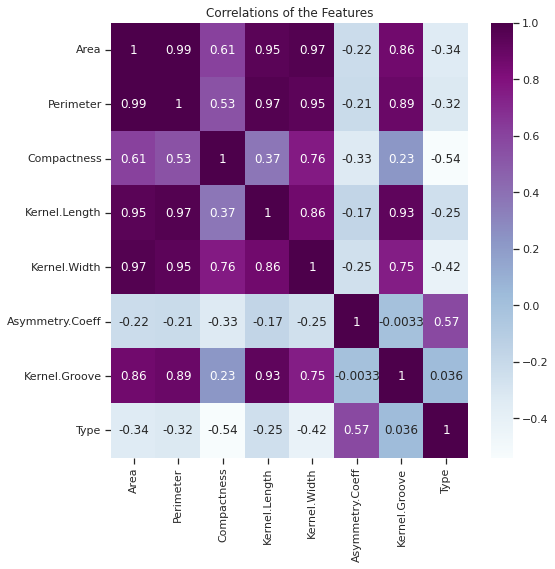

In [50]:
plt.figure(figsize=[8,8])
sns.heatmap(data.corr(), annot=True, cmap="BuPu")
plt.title('Correlations of the Features')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


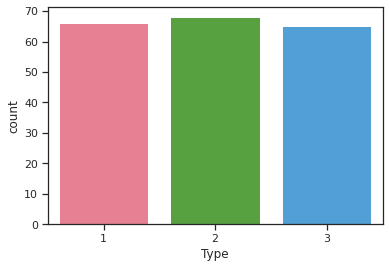

In [51]:
sns.countplot(data['Type'], palette='husl')
plt.show()

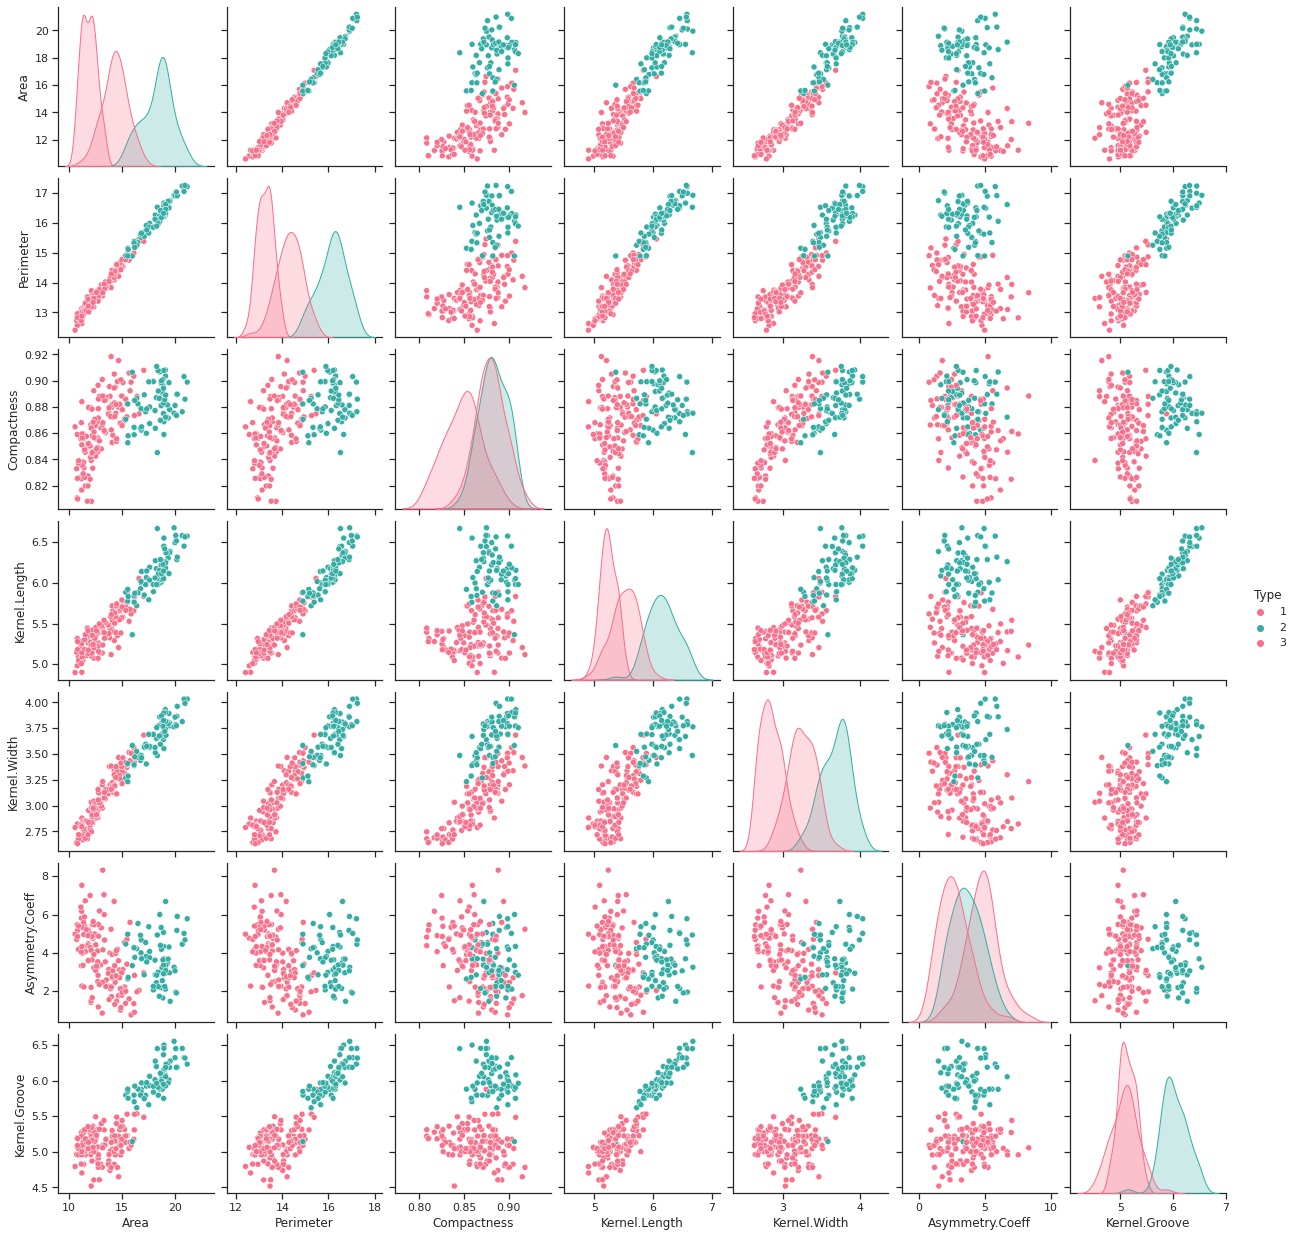

In [52]:
i = sns.pairplot(data, vars = ['Area', 'Perimeter', 'Compactness', 'Kernel.Length', 'Kernel.Width', 'Asymmetry.Coeff', 'Kernel.Groove'] ,hue='Type', palette='husl')
plt.show()

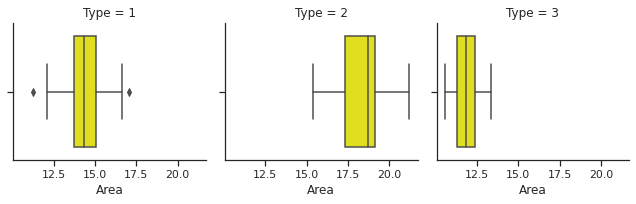

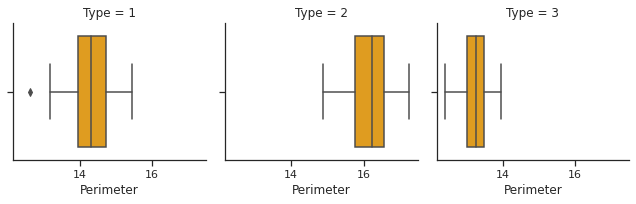

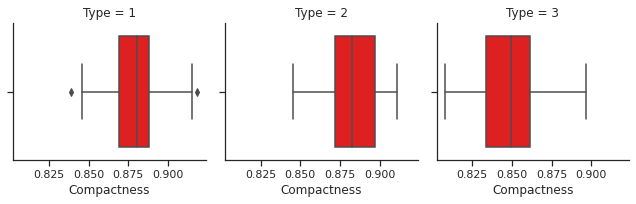

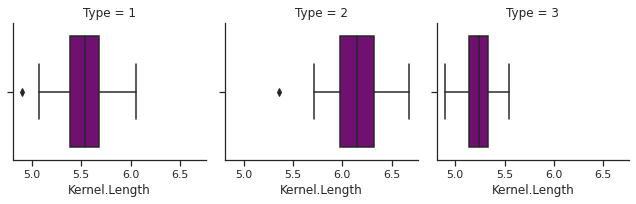

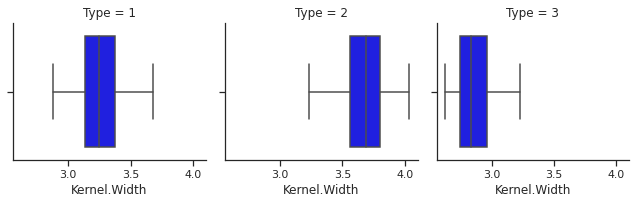

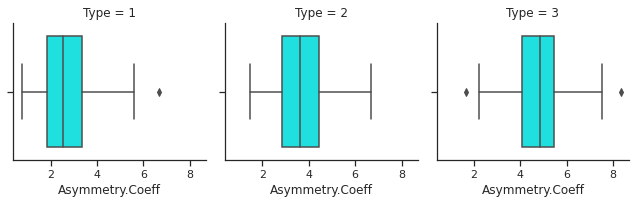

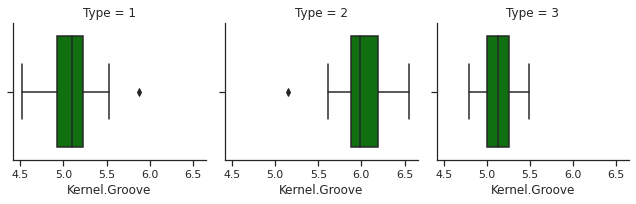

In [53]:
a = sns.FacetGrid(data, col='Type')
a.map(sns.boxplot, 'Area', color='yellow', order=['0', '1', '2'])

p = sns.FacetGrid(data, col='Type')
p.map(sns.boxplot, 'Perimeter', color='orange', order=['0', '1', '2'])

c = sns.FacetGrid(data, col='Type')
c.map(sns.boxplot, 'Compactness', color='red', order=['0', '1', '2'])

lk = sns.FacetGrid(data, col='Type')
lk.map(sns.boxplot, 'Kernel.Length', color='purple', order=['0', '1', '2'])

wk = sns.FacetGrid(data, col='Type')
wk.map(sns.boxplot, 'Kernel.Width', color='blue', order=['0', '1', '2'])

acoef = sns.FacetGrid(data, col='Type')
acoef.map(sns.boxplot, 'Asymmetry.Coeff', color='cyan', order=['0', '1', '2'])

lkg = sns.FacetGrid(data, col='Type')
lkg.map(sns.boxplot, 'Kernel.Groove', color='green', order=['0', '1', '2'])

In [54]:
# Excluding target feature and create a new dataset:
df = data.iloc[:,0:7]
df.head(3)

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825


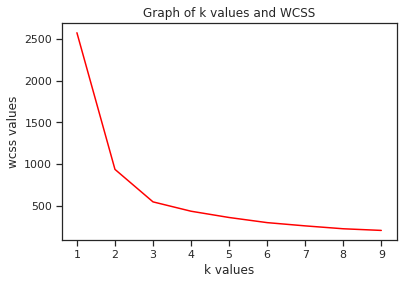

In [55]:
from sklearn.cluster import KMeans

wcss = []

for k in range(1,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
    
# Visualization of k values:

plt.plot(range(1,10), wcss, color='red')
plt.title('Graph of k values and WCSS')
plt.xlabel('k values')
plt.ylabel('wcss values')
plt.show()

K-Means Clustering Algorithm:



In [56]:
kmeans2 = KMeans(n_clusters=3)

# Training the model:
clusters = kmeans2.fit_predict(df)

# Adding a label feature with the predicted class values:
df_k = df.copy(deep=True)
df_k['label'] = clusters

Comparing Original Classes and K-Means Algorithm Classes:

For visualization I will use only two features (A and P) for the original and predicted datasets. Different classes will have seperate color and styles.

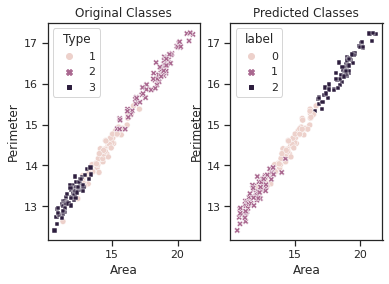

In [57]:
fig, (ax1, ax2) = plt.subplots(1,2)

ax1 = plt.subplot(1,2,1)
plt.title('Original Classes')
sns.scatterplot(x='Area', y='Perimeter', hue='Type', style='Type', data=data, ax=ax1)

ax2 = plt.subplot(1,2,2)
plt.title('Predicted Classes')
sns.scatterplot(x='Area', y='Perimeter', hue='label', style='label', data=df_k, ax=ax2)
plt.show()

In [58]:
print('Original Data Classes:')
print(data.Type.value_counts())
print('-' * 30)
print('Predicted Data Classes:')
print(df_k.label.value_counts())

Original Data Classes:
2    68
1    66
3    65
Name: Type, dtype: int64
------------------------------
Predicted Data Classes:
1    72
0    67
2    60
Name: label, dtype: int64


HIERARCHICAL CLUSTERING ALGORITHM:

Creating the Dendrogram:

We use dendrogram to find how many classes we have in our data set.

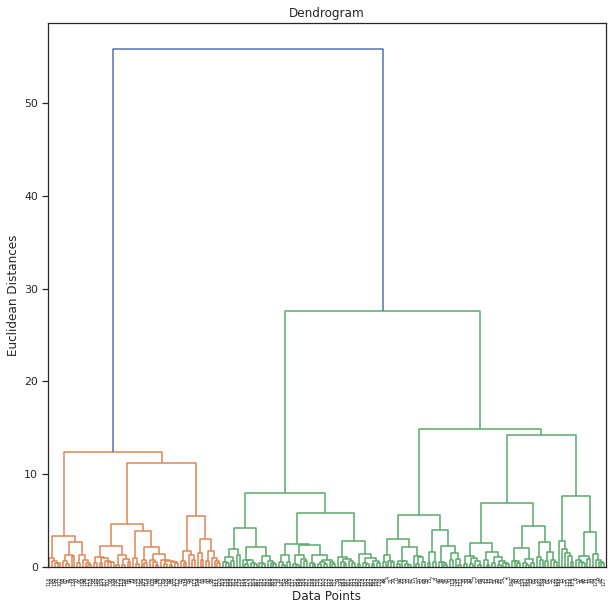

In [59]:
from scipy.cluster.hierarchy import linkage, dendrogram
plt.figure(figsize=[10,10])
merg = linkage(df, method='ward')
dendrogram(merg, leaf_rotation=90)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distances')
plt.show()

Hierarchical Clustering Algorithm:



In [60]:
from sklearn.cluster import AgglomerativeClustering

hie_clus = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster2 = hie_clus.fit_predict(df)

df_h = df.copy(deep=True)
df_h['label'] = cluster2

Comparing Original, K-Means and Hierarchical Clustered Classes:

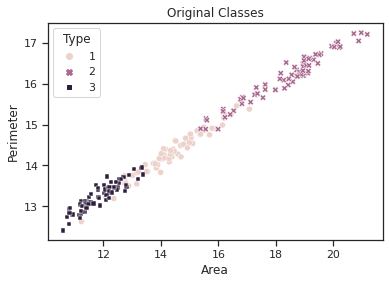

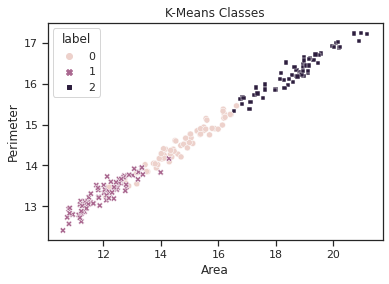

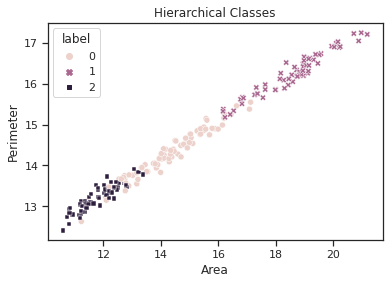

In [61]:
plt.title('Original Classes')
sns.scatterplot(x='Area', y='Perimeter', hue='Type', style='Type', data=data)
plt.show()
plt.title('K-Means Classes')
sns.scatterplot(x='Area', y='Perimeter', hue='label', style='label', data=df_k)
plt.show()
plt.title('Hierarchical Classes')
sns.scatterplot(x='Area', y='Perimeter', hue='label', style='label', data=df_h)
plt.show()

In [62]:
print('Original Data Classes:')
print(data.Type.value_counts())
print('-' * 30)
print('K-Means Predicted Data Classes:')
print(df_k.label.value_counts())
print('-' * 30)
print('Hierarchical Predicted Data Classes:')
print(df_h.label.value_counts())

Original Data Classes:
2    68
1    66
3    65
Name: Type, dtype: int64
------------------------------
K-Means Predicted Data Classes:
1    72
0    67
2    60
Name: label, dtype: int64
------------------------------
Hierarchical Predicted Data Classes:
0    80
1    62
2    57
Name: label, dtype: int64


In [66]:
# Create a Pickle file  
import pickle
pickle_out = open("model.pkl","wb")
pickle.dump(random, pickle_out)
pickle_out.close()